In [14]:
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score, train_test_split
import xgboost as xgb
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    MinMaxScaler,
    LabelEncoder,
    OrdinalEncoder,
)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

In [2]:
df = pd.read_csv("real_estate_dataset_mk_missing.csv")

In [3]:
df.head()

,city,area_sq_meters,num_rooms,floor,year_built,distance_from_center_km,price
0,NaN,80.0,4.0,5.0,2009.0,3.55,150804.0
1,Skopje,92.1,5.0,3.0,2008.0,3.54,178480.0
2,Skopje,97.4,5.0,0.0,2002.0,2.41,168418.0
3,Skopje,49.5,3.0,5.0,2024.0,3.97,90170.0
4,Skopje,NaN,3.0,2.0,NaN,3.75,77454.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     1115 non-null   object 
 1   area_sq_meters           1108 non-null   float64
 2   num_rooms                1114 non-null   float64
 3   floor                    1090 non-null   float64
 4   year_built               1102 non-null   float64
 5   distance_from_center_km  1128 non-null   float64
 6   price                    1105 non-null   float64
dtypes: float64(6), object(1)
memory usage: 65.8+ KB


In [5]:
df.isna().sum()

city                        85
area_sq_meters              92
num_rooms                   86
floor                      110
year_built                  98
distance_from_center_km     72
price                       95
dtype: int64

In [6]:
df["city"].unique()

array([nan, 'Skopje', 'Bitola', 'Ohrid', 'Tetovo', 'Prilep'], dtype=object)

In [9]:
label_encoder = LabelEncoder()
df["city"] = label_encoder.fit_transform(df["city"])

In [11]:
df["city"] = df["city"].replace(0, np.nan)

In [12]:
df["city"].isna().sum()

np.int64(201)

In [16]:
knn_imputer = KNNImputer(n_neighbors=13)
df["city"] = knn_imputer.fit_transform(df[["city"]])
df["city"].isna().sum()

np.int64(0)

In [17]:
df.isna().sum()

city                         0
area_sq_meters              92
num_rooms                   86
floor                      110
year_built                  98
distance_from_center_km     72
price                       95
dtype: int64

<Axes: >

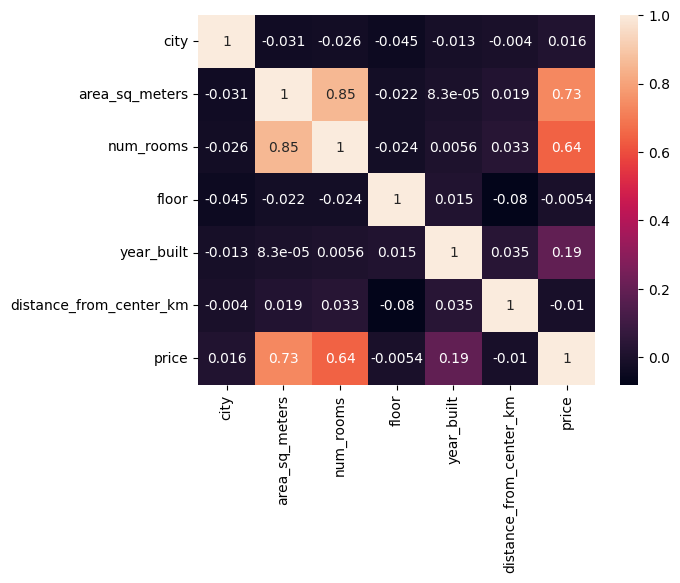

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [19]:
iterative_imputer = IterativeImputer()
imputed_data = iterative_imputer.fit_transform(df[["area_sq_meters", "num_rooms"]])
df[["area_sq_meters", "num_rooms"]] = imputed_data
df.isna().sum()

city                         0
area_sq_meters               0
num_rooms                    0
floor                      110
year_built                  98
distance_from_center_km     72
price                       95
dtype: int64

<Axes: ylabel='Frequency'>

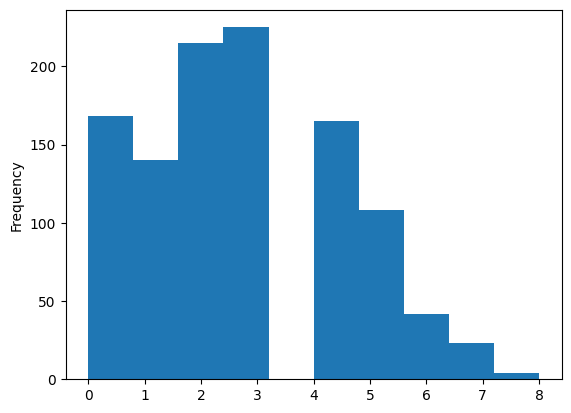

In [20]:
df["floor"].plot.hist()

In [21]:
knn_imputer = KNNImputer(n_neighbors=7)
df["floor"] = knn_imputer.fit_transform(df[["floor"]])

<Axes: ylabel='Frequency'>

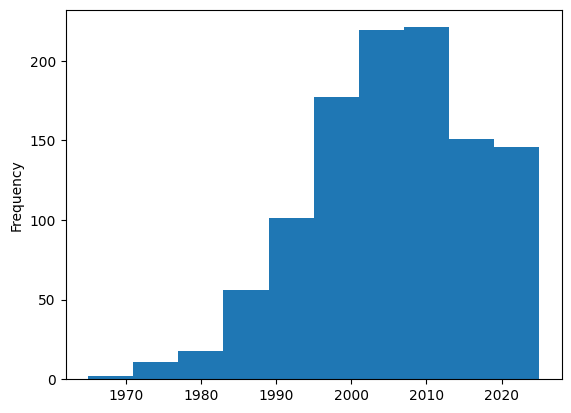

In [22]:
df["year_built"].plot.hist()

In [23]:
imputer = SimpleImputer(strategy="median")
df[["year_built"]] = imputer.fit_transform(df[["year_built"]])

<Axes: ylabel='Frequency'>

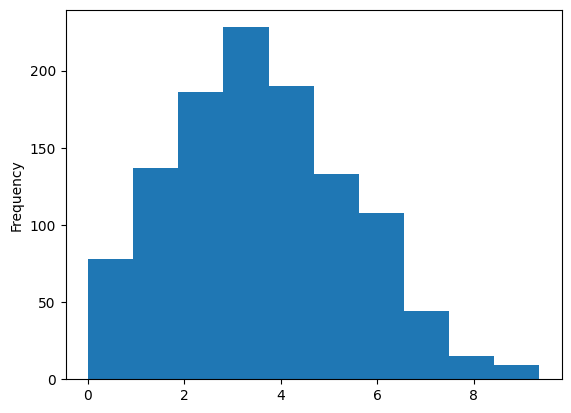

In [24]:
df["distance_from_center_km"].plot.hist()

In [25]:
imputer = SimpleImputer(strategy="median")
df[["distance_from_center_km"]] = imputer.fit_transform(df[["distance_from_center_km"]])

In [26]:
df = df.dropna(subset=["price"], axis=0)
df.isna().sum()

city                       0
area_sq_meters             0
num_rooms                  0
floor                      0
year_built                 0
distance_from_center_km    0
price                      0
dtype: int64

In [28]:
df.shape

(1105, 7)

In [30]:
X, y = df.drop(columns=["price"]), df["price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

y_pred = regressor.predict(X_test)
print("Accuracy:",regressor.score(X_test, Y_test))



Accuracy: 0.8659510506315315


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1,
)


rf.fit(X_train, Y_train)
preds = rf.predict(X_test)

r2 = r2_score(Y_test, preds)
mae = mean_absolute_error(Y_test, preds)
rmse = mean_squared_error(Y_test, preds)

print(f"R²:   {r2:.4f}")
print(f"MAE:  {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")

R²:   0.9223
MAE:  8,395.26
RMSE: 150,925,311.73
